In [2]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from topostats.io import LoadScans
import topostats.filters as topofilters
from topostats.utils import get_mask
from skimage.filters import gaussian
from skimage.morphology import remove_small_objects, label
from skimage.measure import regionprops
from skimage import draw
from topostats.theme import Colormap
import math

In [3]:
cmap = Colormap("nanoscope").get_cmap()


def plot(image: np.ndarray, title: str = None, zlimit: bool = True, figsize: tuple = (8, 8), **kwargs) -> None:
    fig, ax = plt.subplots(figsize=figsize)
    if zlimit == True:
        vmin = -3
        vmax = 4
    else:
        vmin = None
        vmax = None
    ax.imshow(image, vmin=vmin, vmax=vmax, cmap=cmap, **kwargs)
    if title is not None:
        ax.set_title(title)
    plt.show()

[Mon, 11 Dec 2023 15:39:30] [INFO    ] [topostats] Extracting image from PristineZoom\20230126_KPN005_25mMMgCl2_Vac_24hr.0_00006.spm
[Mon, 11 Dec 2023 15:39:30] [INFO    ] [topostats] Loading image from : PristineZoom\20230126_KPN005_25mMMgCl2_Vac_24hr.0_00006.spm
[Mon, 11 Dec 2023 15:39:30] [INFO    ] [topostats] [20230126_KPN005_25mMMgCl2_Vac_24hr.0_00006] : Loaded image from : PristineZoom\20230126_KPN005_25mMMgCl2_Vac_24hr.0_00006.spm
[Mon, 11 Dec 2023 15:39:31] [INFO    ] [topostats] [20230126_KPN005_25mMMgCl2_Vac_24hr.0_00006] : Extracted channel Height
[Mon, 11 Dec 2023 15:39:31] [INFO    ] [topostats] [20230126_KPN005_25mMMgCl2_Vac_24hr.0_00006] : Pixel to nm scaling : 2.1866406250000003


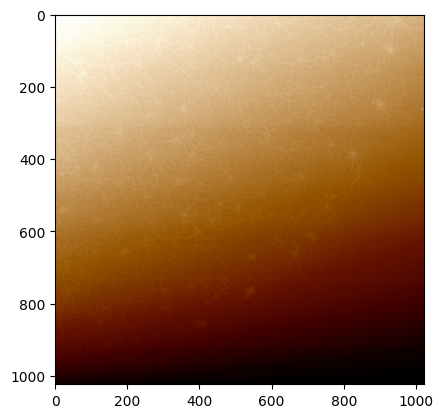

In [4]:
#Import SPM files
#Fibril
#file = Path('./PristineZoom/20221213_KDNA001_MgCl2_H20Sit_Vacuum.0_00022.spm')
#file = Path('./PristineZoom/20230125_KPN005_25mMMgCl2_Vac.0_00009.spm')
#file = Path('./PristineZoom/20230125_KPN005_25mMMgCl2_Vac.0_00014.spm')
#file = Path('./PristineZoom/20230125_KPN005_25mMMgCl2_Vac.0_00018.spm')
file = Path('./PristineZoom/20230126_KPN005_25mMMgCl2_Vac_24hr.0_00006.spm')
#file = Path('./PristineZoom/20230126_KPN005_25mMMgCl2_Vac_24hr.0_00021.spm')
#file = Path('./PristineZoom/20230126_KPN005_25mMMgCl2_Vac_24hr.0_00028.spm')
#file = Path('PristineZoom/20230314_KPN015_25mMMgCl2_0.0_00018.spm')
#Cap
#file = Path('PristineZoom/Mid/20230314_KPN015_25mMMgCl2_0.0_00019.spm')
#file = Path('PristineZoom/Mid/20230417_KPN0018_Metal.0_00002.spm')
#file = Path('PristineZoom/Mid/20230417_KPN0018_Metal.0_00003.spm')
#file = Path('PristineZoom/Mid/20230417_KPN0018_Metal.0_00005.spm')

# Bradley paths
# Fibril
# file = Path('./PristineZoom/20221213_KDNA001_MgCl2_H20Sit_Vacuum.0_00022.spm')
# file = Path('./PristineZoom/20230125_KPN005_25mMMgCl2_Vac.0_00009.spm')
# file = Path('./PristineZoom/20230125_KPN005_25mMMgCl2_Vac.0_00014.spm')
# file = Path('./PristineZoom/20230125_KPN005_25mMMgCl2_Vac.0_00018.spm')
# file = Path('./PristineZoom/20230126_KPN005_25mMMgCl2_Vac_24hr.0_00006.spm')
# file = Path('./PristineZoom/20230126_KPN005_25mMMgCl2_Vac_24hr.0_00021.spm')
# file = Path('./PristineZoom/20230126_KPN005_25mMMgCl2_Vac_24hr.0_00028.spm')
# file = Path('PristineZoom/20230314_KPN015_25mMMgCl2_0.0_00018.spm')
# Cap
# file = Path('PristineZoom/Mid/20230314_KPN015_25mMMgCl2_0.0_00019.spm')
# file = Path('PristineZoom/Mid/20230417_KPN0018_Metal.0_00002.spm')
# file = Path('PristineZoom/Mid/20230417_KPN0018_Metal.0_00003.spm')
# file = Path('PristineZoom/Mid/20230417_KPN0018_Metal.0_00005.spm')

# Digested
# file = Path('./EP_Zoom/20230419_EPN005_Metal.0_00006.spm')

loadscans = LoadScans([file], "Height")
loadscans.get_data()
p_to_nm = loadscans.pixel_to_nm_scaling
image_raw = loadscans.image
plt.imshow(image_raw, cmap=cmap)

In [5]:
filters = topofilters.Filters(
    image=image_raw,
    filename=file,
    pixel_to_nm_scaling=p_to_nm,
    threshold_method="std_dev",
    row_alignment_quantile=0.05,
    threshold_std_dev={"upper": 1.0, "lower": None},
    gaussian_size=1.0,
    remove_scars={"run": False},
)

filters.filter_image()

[Mon, 11 Dec 2023 15:39:33] [INFO    ] [topostats] [PristineZoom\20230126_KPN005_25mMMgCl2_Vac_24hr.0_00006.spm] : Median flattening without mask
[Mon, 11 Dec 2023 15:39:33] [INFO    ] [topostats] [PristineZoom\20230126_KPN005_25mMMgCl2_Vac_24hr.0_00006.spm] : Plane tilt removal without mask
[Mon, 11 Dec 2023 15:39:34] [INFO    ] [topostats] [PristineZoom\20230126_KPN005_25mMMgCl2_Vac_24hr.0_00006.spm] : x-polyfit 1st order: [-0.0137151  13.37369423]
[Mon, 11 Dec 2023 15:39:34] [INFO    ] [topostats] [PristineZoom\20230126_KPN005_25mMMgCl2_Vac_24hr.0_00006.spm] : y-polyfit 1st order: [5.20539445e-04 6.11444001e+00]
[Mon, 11 Dec 2023 15:39:34] [INFO    ] [topostats] [PristineZoom\20230126_KPN005_25mMMgCl2_Vac_24hr.0_00006.spm] : Removing x plane tilt
[Mon, 11 Dec 2023 15:39:35] [INFO    ] [topostats] [PristineZoom\20230126_KPN005_25mMMgCl2_Vac_24hr.0_00006.spm] : removing y plane tilt
[Mon, 11 Dec 2023 15:39:36] [INFO    ] [topostats] [PristineZoom\20230126_KPN005_25mMMgCl2_Vac_24hr.0_0

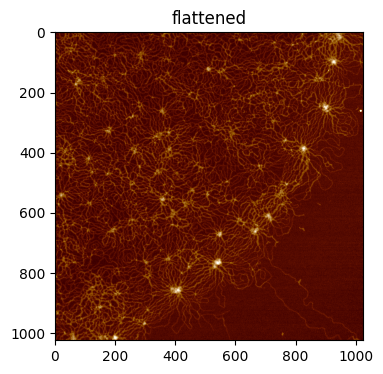

(1024, 1024)


In [6]:
flattened = filters.images["zero_average_background"]
plot(flattened, title="flattened", figsize=(4, 4))
print(flattened.shape)

thresholds: defaultdict(None, {'upper': 1.9051629641217749})
[Mon, 11 Dec 2023 15:39:47] [INFO    ] [topostats] [None] : Masking (upper) Threshold: 1.9051629641217749


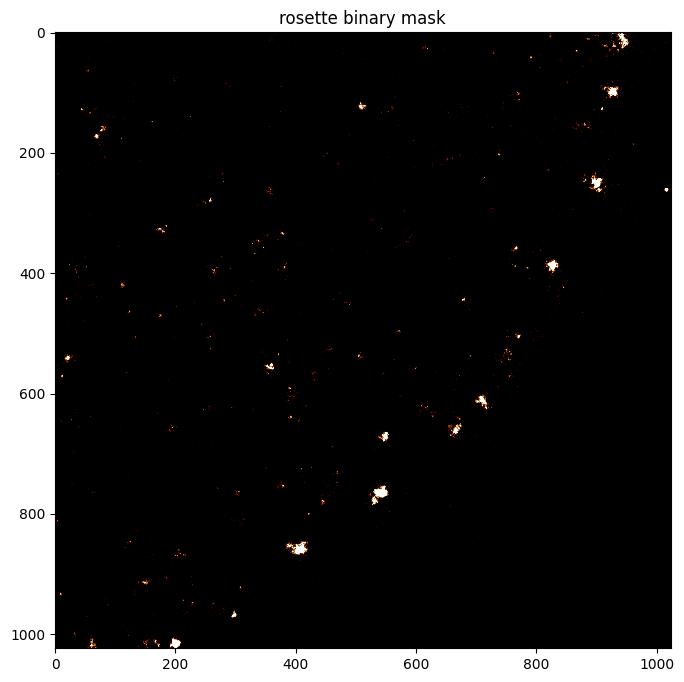

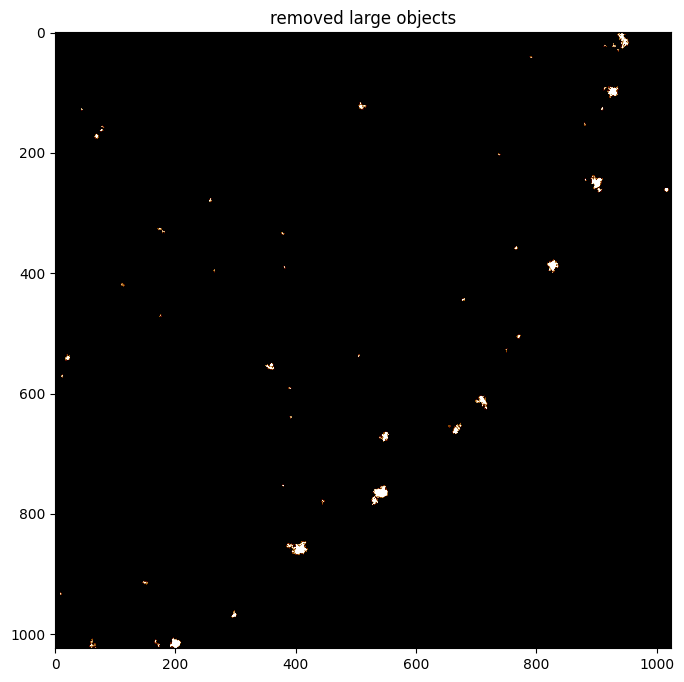

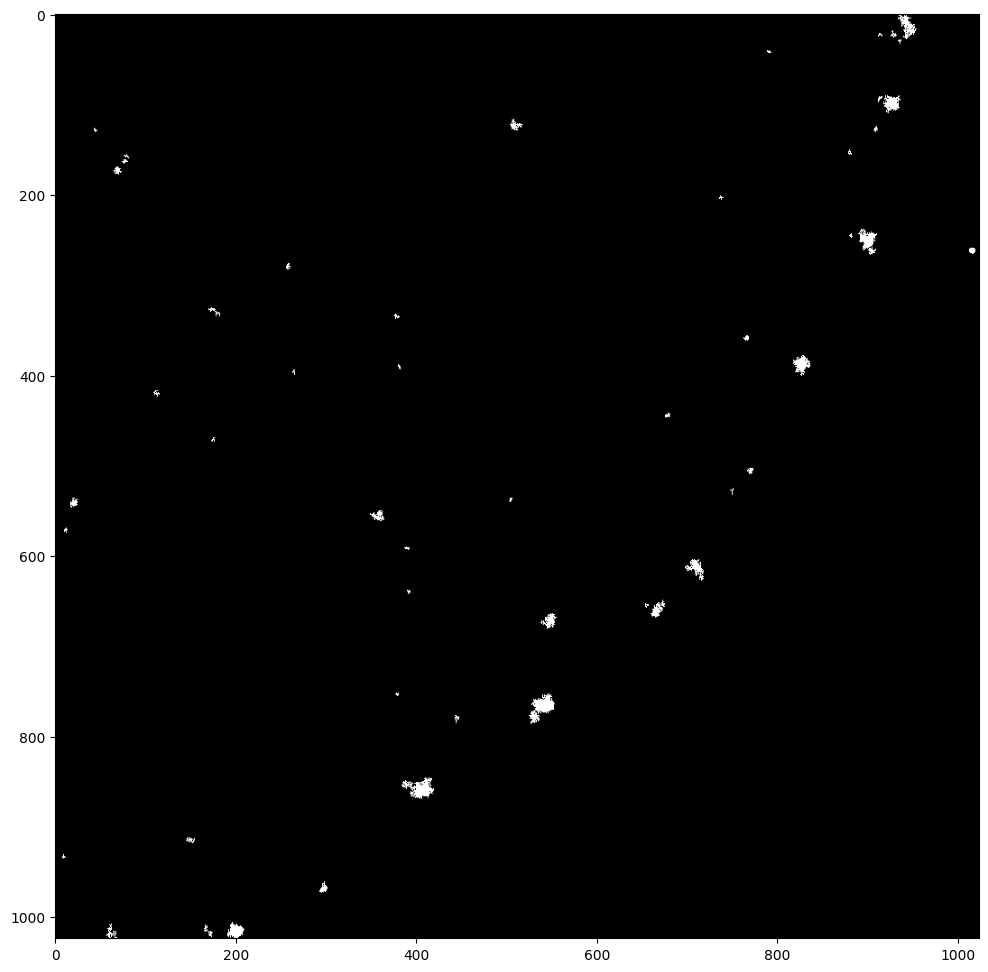

In [7]:
# Locate Nodes

rosette_thresholds = topofilters.get_thresholds(
    flattened, threshold_method="std_dev", threshold_std_dev={"upper": 3, "lower": None}
)

print(f"thresholds: {rosette_thresholds}")
rosette_mask = topofilters.get_mask(image=flattened, thresholds=rosette_thresholds)
plot(rosette_mask.astype(bool), title="rosette binary mask", zlimit=False)

# Remove small objects
removed_small_objects = remove_small_objects(rosette_mask, 10)
# Remove large objects
labelled_rosette_mask = label(removed_small_objects)
regions = regionprops(labelled_rosette_mask)
for props_index, props in enumerate(regions):
    if props.area > 750:
        labelled_rosette_mask[labelled_rosette_mask == props.label] = 0

plot(labelled_rosette_mask.astype(bool), title="removed large objects", zlimit=False)
plt.show()

fig, ax = plt.subplots(figsize=(12, 12))
ax.imshow(labelled_rosette_mask.astype(bool), cmap="gray")

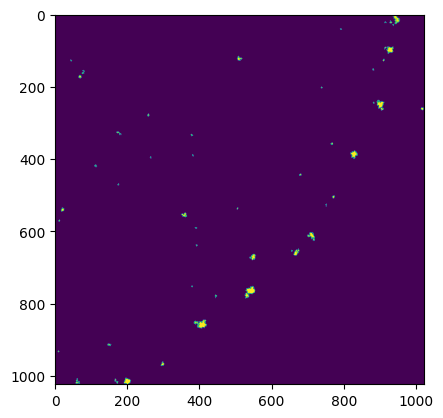

In [8]:
plt.imshow(labelled_rosette_mask.astype(bool))
plt.show()
import network_stats

dir(network_stats)
# Find node centroid coordinates
node_centroids = network_stats.get_node_centroids(labelled_rosette_mask)
# Find node areas
node_areas = network_stats.node_stats(labelled_rosette_mask, flattened)["node areas"]

In [25]:
height_thres = 0.5
strand_multi = np.sqrt(2)
radius = 30
#fibril 35, cap 25

0.45855738602677165
14.0
23.0
18.0
8.0
9.0
11.0
17.0
11.0
7.0
14.0
15.0
29.0
14.0
8.0
4.0
10.0
18.0
26.0
15.0
8.0
7.0
16.0
11.0
11.0
15.0
9.0
16.0
13.0
21.0
7.0
16.0
19.0
8.0
17.0
14.0
18.0
17.0
11.0
15.0
15.0
Average branch coordination: 9.65
Average strand coordination: 13.875


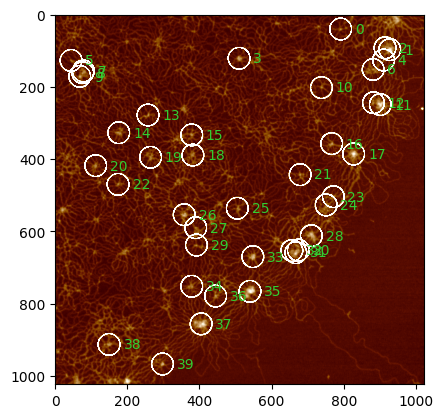

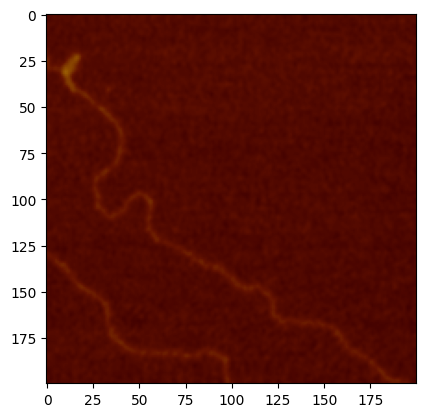

In [30]:
# Create circular masks around each nodes and extract heights

circle_mask = gaussian(
    flattened.copy(), sigma=1.0
)  # Copy of flattened for gathering heights with small gaussian blur to regulate values
circle_image = circle_mask  # Create second mask for drawing on
im_width = math.sqrt(circle_mask.size)
circ_nm = radius * 2 * np.pi * p_to_nm  # circumference of masked circle in nm
region_values, included, area_tot, counts, region_peakarea, branch_counts, strands_count_all, strands_count_sum, node_area_cut = ([],[],[],[],[],[],[],[],[]
)


# Function to find angle of point from centroid
def angle(point, centroid):
    dx, dy = point - centroid
    return (np.arctan2(dy, dx) + 2 * np.pi) % (2 * np.pi)


# Finds the background/surface height using a manual sample - Use only for cap
back_region = circle_image[800:1000, 800:1000]
back_height = np.average(back_region)+height_thres
#back_height = 0.2
print(back_height)
# plt.imshow(back_region, vmin=-3, vmax=4, cmap=cmap)
# plt.show()

# need a list of centroids of the circles that satisfy
# the conditions, so we can label them in the image
# iteratively
filtered_circle_centroids = []
for k, centroid in enumerate(node_centroids):
    rr, cc = draw.circle_perimeter(int(centroid[0]), int(centroid[1]), radius, method="bresenham")
    inc_nm = circ_nm / len(rr)  # spacing between pixels

    if any((i < 0 or i > im_width) for i in rr) or any((j < 0 or j > im_width) for j in cc):
        None  # Ignores points outside of the surveyed region
    else:
        # separates rr,cc into XY pairs
        XY = [i for i in zip(rr, cc)]
        # Sort the points based on their angles around the centroid
        indices = np.argsort([angle(point, centroid) for point in XY])
        sorted, rr_sort, cc_sort = [], [], []
        for i in indices:
            sorted.append(XY[i])
        for j in sorted:
            rr_sort.append(j[0])
            cc_sort.append(j[1])
        # Extracts perimeter values
        perimeter_values = circle_mask[rr_sort, cc_sort]
        # Applies threshold
        perimeter_strands = np.clip(circle_mask[rr_sort, cc_sort] - back_height, 0, 1000)

        # Scans around the mask, identifiying peaks, calcualting area and estimating number of strands
        prev, count, trparea = 0, 0, 0
        peak_areas, strand_count = [], []
        for height in perimeter_strands:
            if height > 0 and prev >= 0:
                trparea = trparea + 0.5 * (height - prev) * inc_nm + prev * inc_nm
            elif height == 0 and prev > 0:
                trparea = trparea + 0.5 * (height - prev) * inc_nm + prev * inc_nm
                peak_areas.append(trparea)
                if trparea < 10:
                    strand = math.ceil(trparea / (math.sqrt(trparea) * strand_multi))
                    strand_count = np.append(strand_count, strand)
                trparea = 0
            prev = height

        branch_count = len(strand_count)
        strands_count_all.append(strand_count)
        strands_count_sum.append(sum(strand_count))
        print(sum(strand_count))

        # Appends branch/strand data to list from all nodes
        branch_counts = np.append(branch_counts, branch_count)
        region_peakarea.append(peak_areas)
        region_values.append(perimeter_values)
        node_area_cut.append(node_areas[k])

        circle_image[rr_sort, cc_sort] = 100
        area_tot = np.trapz(region_values, dx=5)
        # print("Area:",area_tot)

        filtered_circle_centroids.append(centroid)
print("Average branch coordination:", (np.mean(branch_counts)))
print("Average strand coordination:",(np.mean(strands_count_sum)))
# print(strands_count_all)
# print(node_area_cut)
#print("Peak Areas:", region_peakarea)
#for p in node_area_cut:
#    print(p)

plt.imshow(circle_image, vmin=-3, vmax=4, cmap=cmap)
for index, centroid in enumerate(filtered_circle_centroids):
    plt.text(centroid[1] + 40, centroid[0] + 10, f"{index}", color="limegreen")
plt.show()

subsection = circle_image[800:1000, 800:1000]
plt.imshow(subsection, vmin=-3, vmax=4, cmap=cmap)
plt.show()

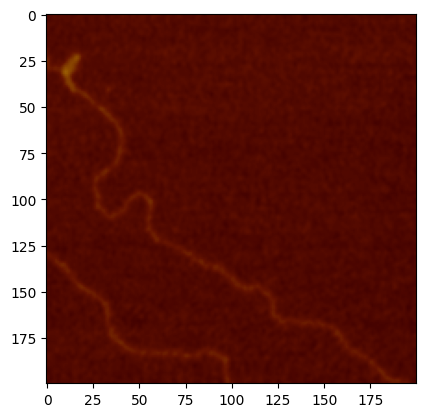

Radius 0 Average branch count: 0.0 Average strand coord: 0.0


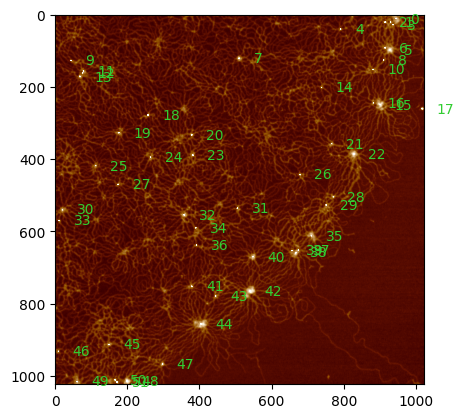

Radius 5 Average branch count: 0.057692307692307696 Average strand coord: 0.38461538461538464


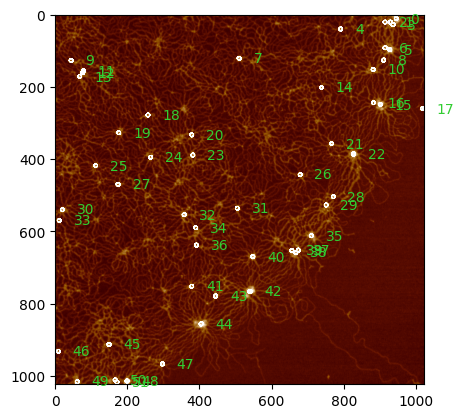

Radius 10 Average branch count: 1.0851063829787233 Average strand coord: 2.9148936170212765


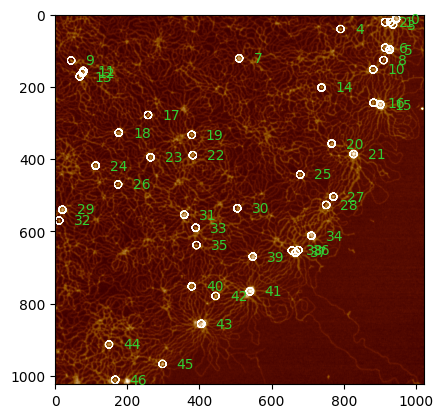

Radius 15 Average branch count: 2.8863636363636362 Average strand coord: 7.4772727272727275


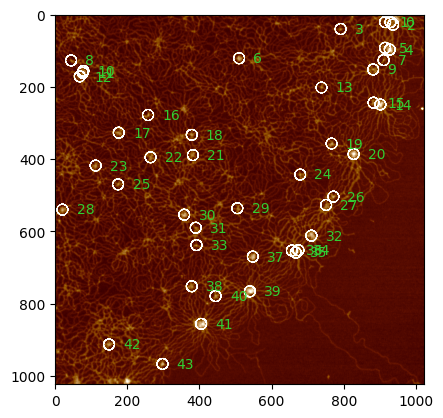

Radius 20 Average branch count: 4.340909090909091 Average strand coord: 10.272727272727273


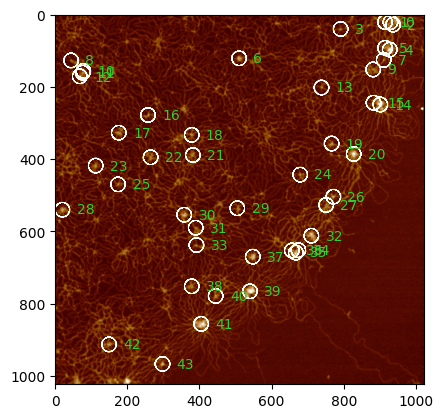

Radius 25 Average branch count: 6.2439024390243905 Average strand coord: 13.78048780487805


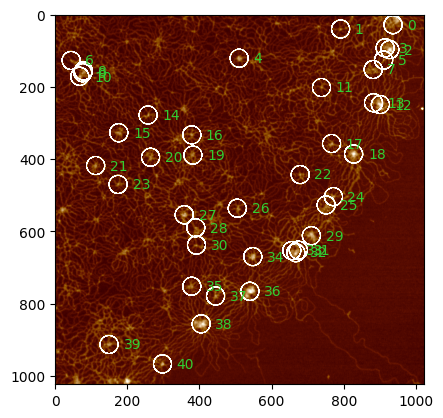

Radius 30 Average branch count: 8.15 Average strand coord: 17.275


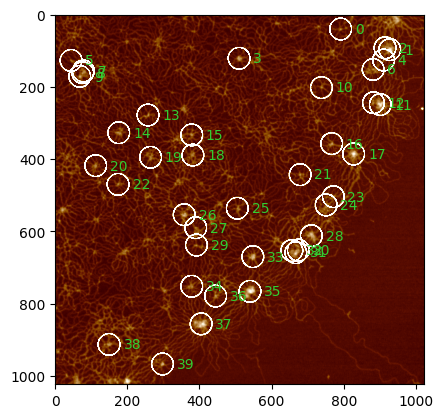

Radius 35 Average branch count: 10.05 Average strand coord: 21.325


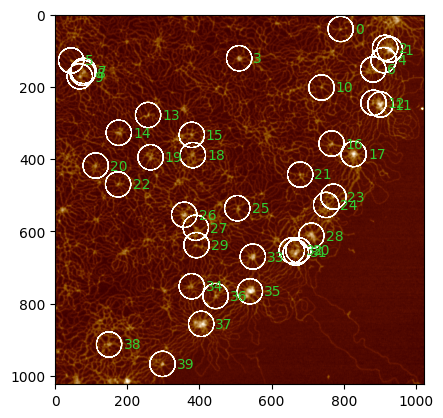

Radius 40 Average branch count: 11.975 Average strand coord: 25.8


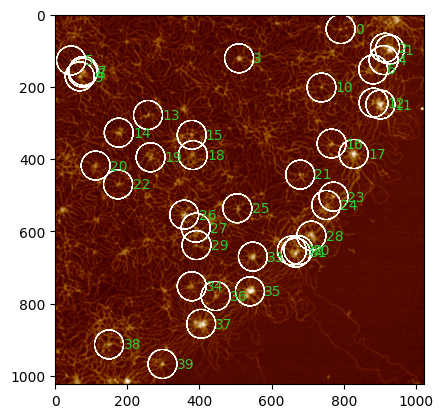

Radius 45 Average branch count: 13.0 Average strand coord: 28.289473684210527


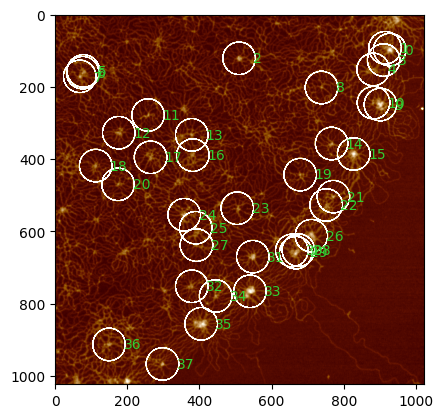

In [49]:
#Variables - Circle Radius, Height Threshold, Strand Multiplier, Background Height

# Finds the background/surface height using a manual sample - Use only for cap
back_region = circle_image[800:1000, 800:1000]
back_height = np.average(back_region)
plt.imshow(back_region, vmin=-3, vmax=4, cmap=cmap)
plt.show()

radii,branchcount,coordination = [],[],[]

for radius in range (0,50,5):
    circle_mask = gaussian(flattened.copy(), sigma=1.0) #Copy of flattened for gathering heights with small gaussian blur to regulate values
    circle_image = circle_mask #Create second mask for drawing on 
    im_width = math.sqrt(circle_mask.size)
    circ_nm = radius*2*np.pi*p_to_nm #circumference of masked circle in nm
    region_values, included, area_tot, counts, region_peakarea, branch_counts, strands_count_all, strands_count_sum, node_area_cut = ([],[],[],[],[],[],[],[],[])
    # Function to find angle of point from centroid
    def angle(point, centroid):
        dx, dy = point - centroid
        return (np.arctan2(dy, dx) + 2 * np.pi) % (2 * np.pi)

    # need a list of centroids of the circles that satisfy
    # the conditions, so we can label them in the image
    # iteratively
    filtered_circle_centroids = []
    for k, centroid in enumerate(node_centroids):
    
        rr,cc = draw.circle_perimeter(int(centroid[0]), int(centroid[1]), radius, method='bresenham')
        inc_nm = circ_nm/len(rr) #spacing between pixels

        if any((i<0 or i>im_width) for i in rr) or any((j<0 or j>im_width) for j in cc):
            None #Ignores points outside of the surveyed region
        else:  
            #separates rr,cc into XY pairs
            XY = [i for i in zip(rr,cc)]
            # Sort the points based on their angles around the centroid
            indices = ((np.argsort([angle(point, centroid) for point in XY])))
            sorted,rr_sort,cc_sort = [],[],[]
            for i in indices:
                sorted.append(XY[i])
            for j in sorted:
                rr_sort.append(j[0])
                cc_sort.append(j[1])
            #Extracts perimeter values
            perimeter_values = circle_mask[rr_sort,cc_sort]
            #Applies threshold
            perimeter_strands = np.clip(circle_mask[rr_sort,cc_sort]-back_height,0,1000)

            #Scans around the mask, identifiying peaks, calcualting area and estimating number of strands
            prev,count,trparea = 0,0,0
            peak_areas, strand_count = [],[]
            for height in perimeter_strands:
                if height > 0 and prev >= 0:
                    trparea = trparea + 0.5*(height-prev)*inc_nm + prev*inc_nm 
                elif height == 0 and prev > 0:
                    trparea = trparea + 0.5*(height-prev)*inc_nm + prev*inc_nm
                    peak_areas.append(trparea)
                    if trparea < 50:
                        strand = math.ceil((trparea)/6) #strand multi
                        strand_count= np.append(strand_count, strand)
                    trparea = 0
                prev = height
                
            branch_count = len(strand_count)
            strands_count_all.append(strand_count)
            strands_count_sum.append(sum(strand_count))
            #print(sum(strand_count))

            #Appends branch/strand data to list from all nodes
            branch_counts= np.append(branch_counts,branch_count)
            region_peakarea.append(peak_areas)
            region_values.append(perimeter_values)
            node_area_cut.append(node_areas[k])

            circle_image[rr_sort,cc_sort] = 100
            area_tot = np.trapz(region_values,dx=5)
            #print("Area:",area_tot)

            filtered_circle_centroids.append(centroid)
    
    print("Radius",radius,"Average branch count:",(np.mean(branch_counts)),"Average strand coord:",(np.mean(strands_count_sum)))
    radii.append(radius)
    branchcount.append(np.mean(branch_counts))
    coordination.append(np.mean(strands_count_sum))

    plt.imshow(circle_image, vmin=-3, vmax=4, cmap=cmap)
    for index, centroid in enumerate(filtered_circle_centroids):
        plt.text(centroid[1]+40, centroid[0]+10, f'{index}', color='limegreen')
    plt.show()


    

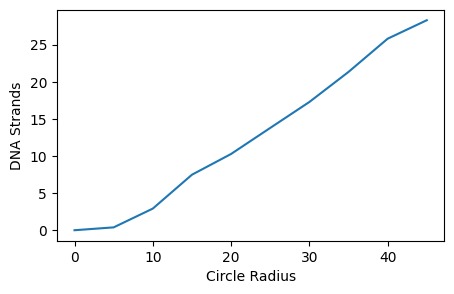

In [50]:
fig, ax = plt.subplots(figsize=(5,3))
plt.plot(radii,coordination)
plt.xlabel("Circle Radius")
plt.ylabel("DNA Strands")
plt.show()

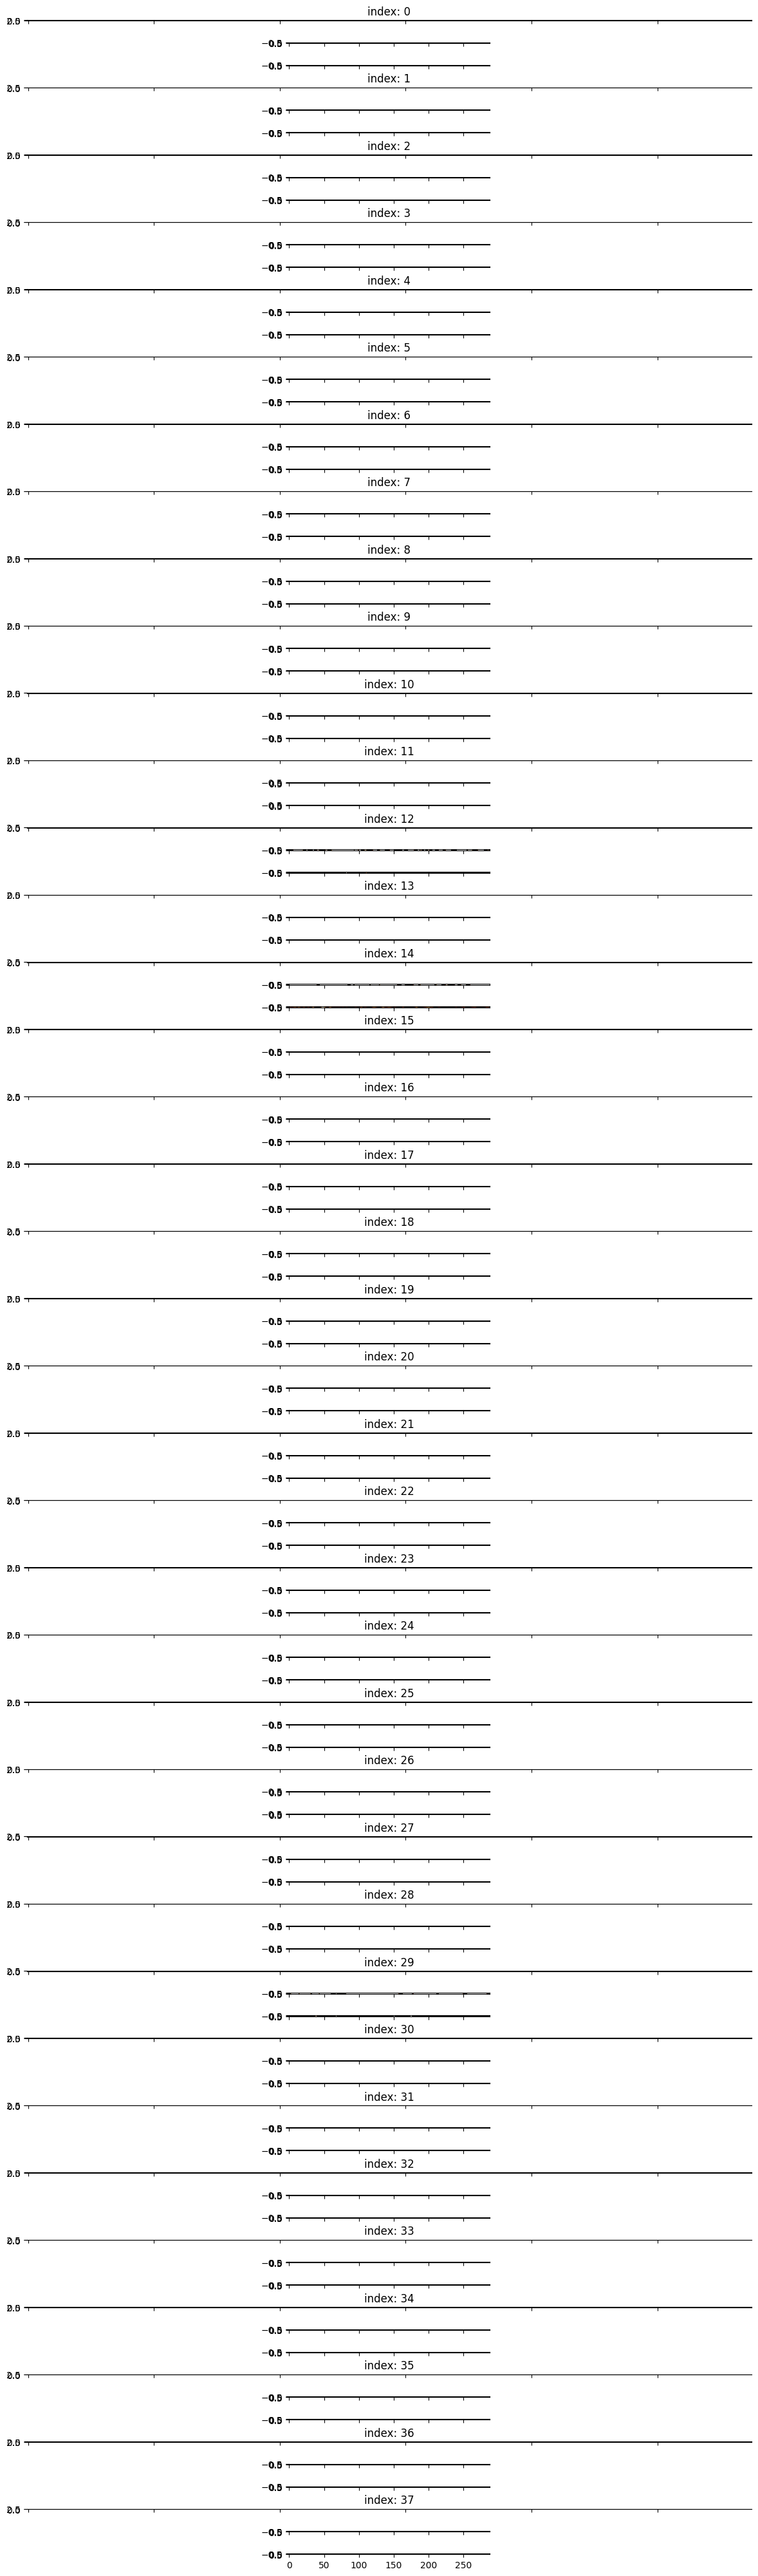

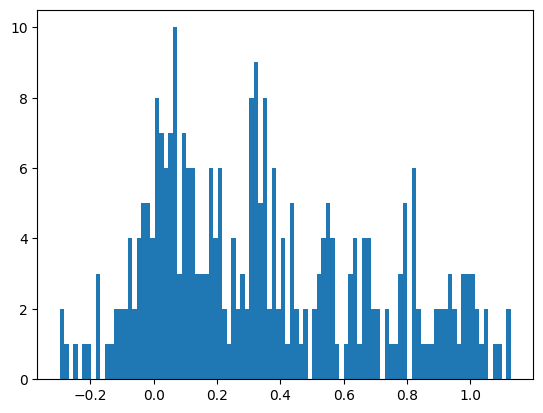

"\n#Single plot\ni = 0\nvalues = region_values[0]\nfor j in values:\n    print(j)\nfor k,point in enumerate(values):\n    print(inc_nm*k)\nfig, ax = plt.subplots(3,1,figsize=(12, 3), sharex=True)\nax[0].set_ylim(-1, 2.5)\nax[0].plot(values)\nax[1].imshow(np.array([values > 0.5]), cmap=cmap)\nax[2].imshow(np.array([values]), cmap=cmap)\nax[0].set_title(f'index: {i}')\nfig.tight_layout()\nplt.show()\n#"

In [46]:
# Plot height trace with pixels and estimated branch widths

height_ratios = [1, 2, 2] * len(region_values)
fig, ax = plt.subplots(
    len(region_values * 3), 1, figsize=(12, 40), sharex=True, gridspec_kw={"height_ratios": height_ratios}
)
for i, values in enumerate(region_values):
    ax[i * 3].set_ylim(-1, 2.5)
    ax[i * 3].plot(values)
    ax[i * 3 + 1].imshow(np.array([values > back_height]), cmap=cmap)
    ax[i * 3 + 2].imshow(np.array([values]), cmap=cmap)
    ax[i * 3].set_title(f"index: {i}")
fig.tight_layout()
plt.show()
index = 0
values = region_values[index]
fig, ax = plt.subplots()
ax.hist(values, bins=100)
plt.show()
"""
#Single plot
i = 0
values = region_values[0]
for j in values:
    print(j)
for k,point in enumerate(values):
    print(inc_nm*k)
fig, ax = plt.subplots(3,1,figsize=(12, 3), sharex=True)
ax[0].set_ylim(-1, 2.5)
ax[0].plot(values)
ax[1].imshow(np.array([values > 0.5]), cmap=cmap)
ax[2].imshow(np.array([values]), cmap=cmap)
ax[0].set_title(f'index: {i}')
fig.tight_layout()
plt.show()
#"""